# Desafío Telecom X

El desafío Telecom X ofrece una oportunidad única para aplicar habilidades esenciales de análisis de datos en un escenario de negocios real.

##Aplicación práctica del conocimiento

La limpieza y tratamiento de datos es una habilidad fundamental para cualquier analista de datos. La manipulación de grandes volúmenes de información exige la capacidad de identificar y corregir inconsistencias en los datos, como valores nulos, duplicados y datos fuera de estándar. Garantizar que los datos estén listos para el análisis es un paso esencial para obtener resultados precisos y confiables.

El análisis exploratorio de datos (EDA) es una etapa crucial para comprender en profundidad los datos. La capacidad de aplicar estadísticas descriptivas y generar visualizaciones permite identificar patrones, tendencias y relaciones entre las variables. Esto ayuda a formular hipótesis y generar insights que pueden influir en decisiones estratégicas dentro de la empresa.

Al participar en este desafío, aplicarás conocimientos esenciales para el análisis de grandes volúmenes de datos en un contexto real, donde tus hallazgos podrán impactar directamente en las estrategias de la empresa para mejorar el principal problema que están enfrentando.

Este desafío no solo contribuye a tu crecimiento en el área de Data Science, sino que también ofrece la oportunidad de entender cómo la ciencia de datos puede aplicarse para resolver problemas reales que enfrentan las empresas en el mercado.

##Diccionario de datos

* customerID: número de identificación único de cada cliente

* Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)

* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

* Partner: si el cliente tiene o no una pareja

* Dependents: si el cliente tiene o no dependientes

* tenure: meses de contrato del cliente

* PhoneService: suscripción al servicio telefónico

* MultipleLines: suscripción a más de una línea telefónica

* InternetService: suscripción a un proveedor de internet

* OnlineSecurity: suscripción adicional de seguridad en línea

* OnlineBackup: suscripción adicional de respaldo en línea

* DeviceProtection: suscripción adicional de protección del dispositivo

* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

* StreamingTV: suscripción de televisión por cable

* StreamingMovies: suscripción de streaming de películas

* Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea*

* PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

* Charges.Total: total gastado por el cliente

# ⚙ Configuraciones iniciales

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from IPython.display import display
import seaborn as sns
import plotly.express as px
import json

url = '/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/TelecomX_Data.json'

#📌 Extracción

In [41]:
data = pd.read_json(url)
data_copy = data.copy()
data_copy.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [42]:
print('dimensiones del dataset: ', data_copy.shape)
print('\ncolumnas: \n', data_copy.columns)
print('\ntipo de datos: \n', data_copy.dtypes)
print('\ndatos nulos: \n', data_copy.isnull().sum())

dimensiones del dataset:  (7267, 6)

columnas: 
 Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

tipo de datos: 
 customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

datos nulos: 
 customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [43]:
print(json.dumps(data_copy["customer"].iloc[0], indent=2))
print(json.dumps(data_copy["phone"].iloc[0], indent=2))
print(json.dumps(data_copy["internet"].iloc[0], indent=2))
print(json.dumps(data_copy["account"].iloc[0], indent=2))

{
  "gender": "Female",
  "SeniorCitizen": 0,
  "Partner": "Yes",
  "Dependents": "Yes",
  "tenure": 9
}
{
  "PhoneService": "Yes",
  "MultipleLines": "No"
}
{
  "InternetService": "DSL",
  "OnlineSecurity": "No",
  "OnlineBackup": "Yes",
  "DeviceProtection": "No",
  "TechSupport": "Yes",
  "StreamingTV": "Yes",
  "StreamingMovies": "No"
}
{
  "Contract": "One year",
  "PaperlessBilling": "Yes",
  "PaymentMethod": "Mailed check",
  "Charges": {
    "Monthly": 65.6,
    "Total": "593.3"
  }
}


In [44]:
customer_df = pd.json_normalize(data_copy['customer'])
phone_df = pd.json_normalize(data_copy['phone'])
internet_df = pd.json_normalize(data_copy["internet"])
account_df = pd.json_normalize(data_copy["account"])

if "Charges" in account_df.columns:
    charges_df = pd.json_normalize(data_copy["account"].apply(lambda x: x.get("Charges", {})))


    data_unificado = pd.concat([
        data_copy[["customerID", "Churn"]],
        customer_df,
        phone_df,
        internet_df,
        account_df.drop(columns=["Charges"]),
        charges_df.rename(columns={"Monthly": "Charges_Monthly", "Total": "Charges_Total"})
    ], axis=1)

else:
      # Por si 'Charges' ya está expandido dentro de account_df
    data_unificado = pd.concat([
        data_copy[["customerID", "Churn"]],
        customer_df,
        phone_df,
        internet_df,
        account_df  # ya contiene Monthly y Total directamente
    ], axis=1)

    data_unificado.columns = data_unificado.columns.str.strip()
    data_unificado.rename(columns={"Charges.Monthly": "Charges_Monthly",
                                   "Charges.Total": "Charges_Total"},
                          inplace=True)

In [45]:
print("Shape final:", data_unificado.shape)
print(data_unificado.dtypes)

Shape final: (7267, 21)
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges_Monthly     float64
Charges_Total        object
dtype: object


In [46]:
#convertir valores a numericos
data_unificado["Charges_Monthly"] = pd.to_numeric(data_unificado["Charges_Monthly"], errors="coerce")
data_unificado['Charges_Total'] = pd.to_numeric(data_unificado["Charges_Total"], errors="coerce")

#convertir los textos como yes y no en valores booleanos

yes_no_cols = [
    "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

data_unificado[yes_no_cols] = data_unificado[yes_no_cols].replace({"Yes": True, "No": False})

data_unificado["Churn"] = data_unificado["Churn"].astype(str).str.strip().str.title()
data_unificado["Churn"] = data_unificado["Churn"].map({"Yes": True, "No": False})
data_unificado = data_unificado.dropna(subset=["Churn"])
data_unificado["Churn"] = data_unificado["Churn"].astype(bool)


print(data_unificado.dtypes)

customerID           object
Churn                  bool
gender               object
SeniorCitizen         int64
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       bool
PaymentMethod        object
Charges_Monthly     float64
Charges_Total       float64
dtype: object


/tmp/ipython-input-3337671513.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_unificado[yes_no_cols] = data_unificado[yes_no_cols].replace({"Yes": True, "No": False})


In [47]:
print(data_unificado["Churn"].dtype)
print(data_unificado["Churn"].value_counts(dropna=False))

bool
Churn
False    5174
True     1869
Name: count, dtype: int64


In [48]:
data_unificado = data_unificado.dropna(subset=["Charges_Total"])
data_unificado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [49]:
for col in data_unificado.select_dtypes(include="object"):
    print(f"{col}: {data_unificado[col].unique()}")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
gender: ['Female' 'Male']
MultipleLines: [False True 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [False True 'No internet service']
OnlineBackup: [True False 'No internet service']
DeviceProtection: [False True 'No internet service']
TechSupport: [True False 'No internet service']
StreamingTV: [True False 'No internet service']
StreamingMovies: [False True 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [50]:
cols_no_internet = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

data_unificado[cols_no_internet] = data_unificado[cols_no_internet].replace("No internet service", False)
data_unificado["MultipleLines"] = data_unificado["MultipleLines"].replace("No phone service", False)

data_unificado.dtypes


/tmp/ipython-input-4173605028.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_unificado[cols_no_internet] = data_unificado[cols_no_internet].replace("No internet service", False)
/tmp/ipython-input-4173605028.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_unificado["MultipleLines"] = data_unificado["MultipleLines"].replace("No phone service", False)


,0
customerID,object
Churn,bool
gender,object
SeniorCitizen,int64
Partner,bool
Dependents,bool
tenure,int64
PhoneService,bool
MultipleLines,bool
InternetService,object


In [51]:
data_unificado["Cuentas_Diarias"] = data_unificado["Charges_Monthly"]/30
print(data_unificado[['Charges_Monthly', "Cuentas_Diarias"]].head())

   Charges_Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


In [52]:
data_unificado["tenure"]

,tenure
0,9
1,9
2,4
3,13
4,3
...,...
7262,13
7263,22
7264,2
7265,67


#📊 Carga y análisis

In [53]:
num_cols = data_unificado.select_dtypes(include=["int64", "float64"]).columns

desc_numerico = data_unificado[num_cols].agg(
    ['count', 'mean', 'std', 'min', 'median', 'max']
).T
print("Estadisicas descriptivas numericas")
print(desc_numerico)

cat_cols = data_unificado.select_dtypes(include=["object", "bool"]).columns

print("\nEstadisticas descriptivas categoricas")
for col in cat_cols:
    print(f"\n{col}:")
    print(data_unificado[col].value_counts(normalize=True).round(3)* 100)

Estadisicas descriptivas numericas
                  count         mean          std        min    median  \
SeniorCitizen    7032.0     0.162400     0.368844   0.000000     0.000   
tenure           7032.0    32.421786    24.545260   1.000000    29.000   
Charges_Monthly  7032.0    64.798208    30.085974  18.250000    70.350   
Charges_Total    7032.0  2283.300441  2266.771362  18.800000  1397.475   
Cuentas_Diarias  7032.0     2.159940     1.002866   0.608333     2.345   

                         max  
SeniorCitizen       1.000000  
tenure             72.000000  
Charges_Monthly   118.750000  
Charges_Total    8684.800000  
Cuentas_Diarias     3.958333  

Estadisticas descriptivas categoricas

customerID:
customerID
9995-HOTOH    0.0
0002-ORFBO    0.0
0003-MKNFE    0.0
0004-TLHLJ    0.0
0011-IGKFF    0.0
             ... 
0018-NYROU    0.0
0017-IUDMW    0.0
0017-DINOC    0.0
0016-QLJIS    0.0
0015-UOCOJ    0.0
Name: proportion, Length: 7032, dtype: float64

Churn:
Churn
False    73.

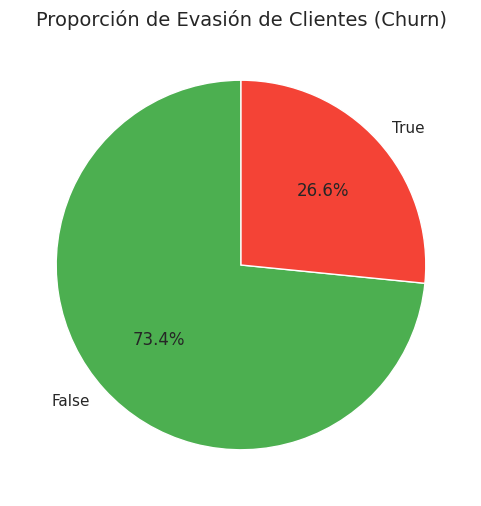

In [54]:
churn_counts = data_unificado['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336']
)
plt.title('Proporción de Evasión de Clientes (Churn)', fontsize=14)
plt.show()


/tmp/ipython-input-2231644092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


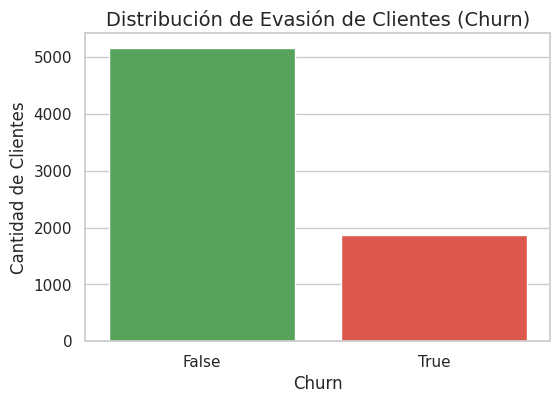

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=data_unificado,
    x='Churn',
    palette=['#4CAF50', '#F44336']
)
plt.title('Distribución de Evasión de Clientes (Churn)', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()


/tmp/ipython-input-308401100.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


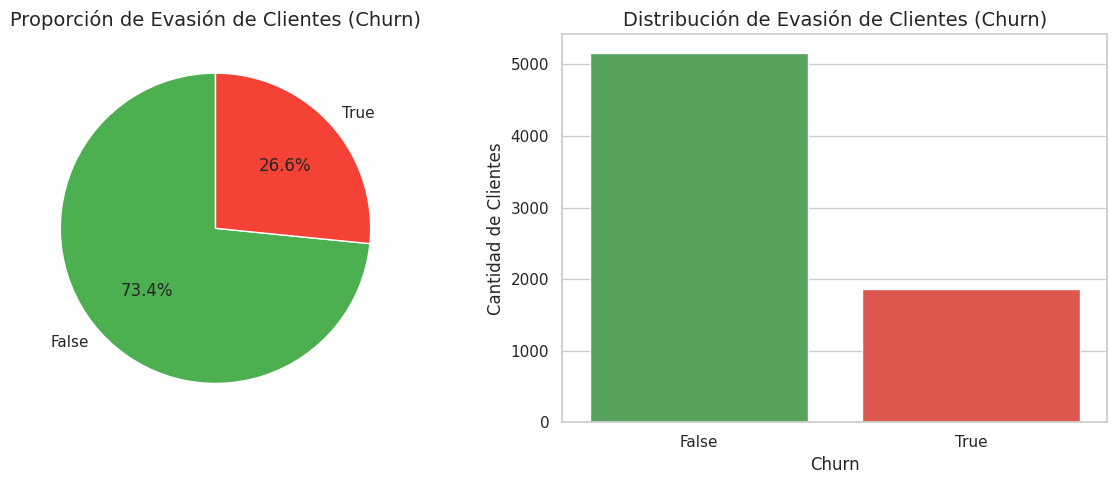

In [56]:
churn_counts = data_unificado['Churn'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336']
)
axes[0].set_title('Proporción de Evasión de Clientes (Churn)', fontsize=14)


sns.countplot(
    data=data_unificado,
    x='Churn',
    palette=['#4CAF50', '#F44336']
)
axes[1].set_title('Distribución de Evasión de Clientes (Churn)', fontsize=14)
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Cantidad de Clientes')

plt.tight_layout()
plt.show()

fig.savefig("/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/grafica_distrivucion_evacion.png",
            transparent=False, dpi=300, bbox_inches='tight')

In [57]:
categorical_vars = ["gender", "Contract", "PaymentMethod", "InternetService"]

def churn_by_category(df, column):
    plt.figure(figsize=(8,4))
    sns.countplot(
        data=df,
        x=column,
        hue='Churn',
        palette=['#4CAF50', '#F44336']
    )
    plt.title(f'Distribución de Churn por {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

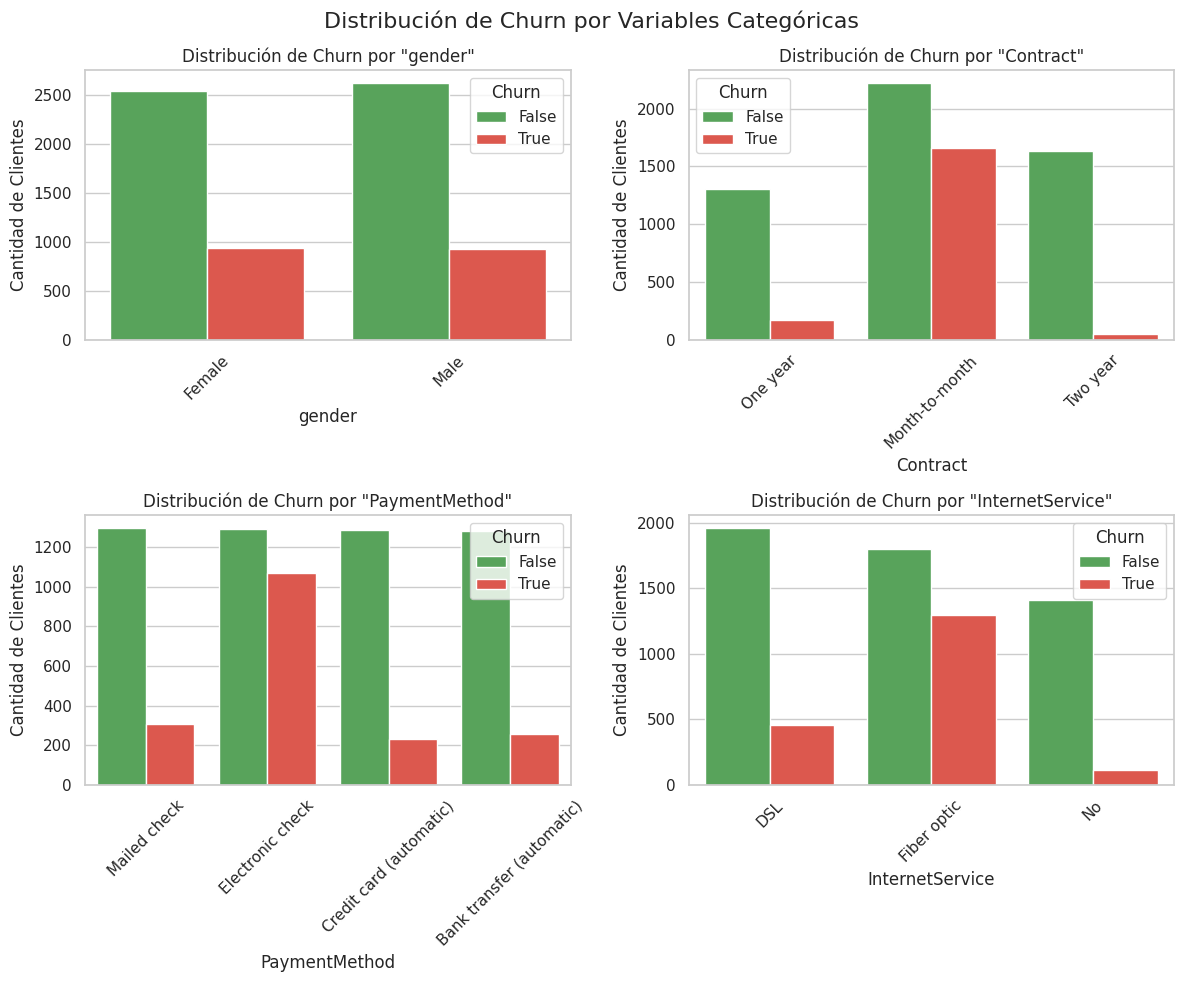

In [58]:
categorical_vars = ["gender", "Contract", "PaymentMethod", "InternetService"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Distribución de Churn por Variables Categóricas', fontsize=16)

for ax, var in zip(axes.ravel(), categorical_vars):
    sns.countplot(
        data=data_unificado,
        x=var,
        hue='Churn',
        palette=['#4CAF50', '#F44336'],
        ax=ax
    )
    ax.set_title(f'Distribución de Churn por "{var}"', fontsize=12)
    ax.set_xlabel(var)
    ax.set_ylabel('Cantidad de Clientes')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Churn')

plt.tight_layout()
plt.show()



fig.savefig("/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/grafica_distrivucion_Categóricas.png",
            transparent=False, dpi=300, bbox_inches='tight')

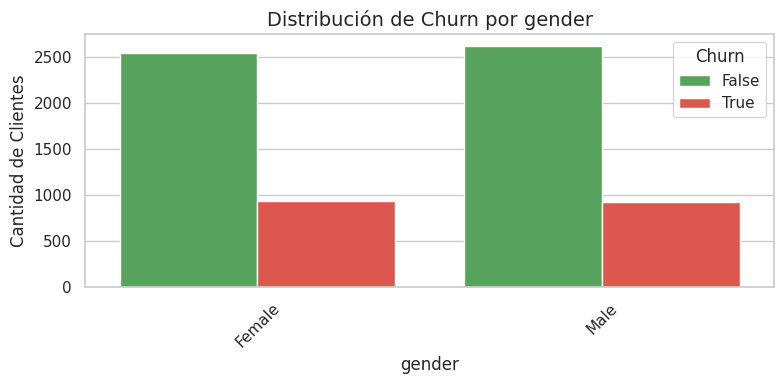

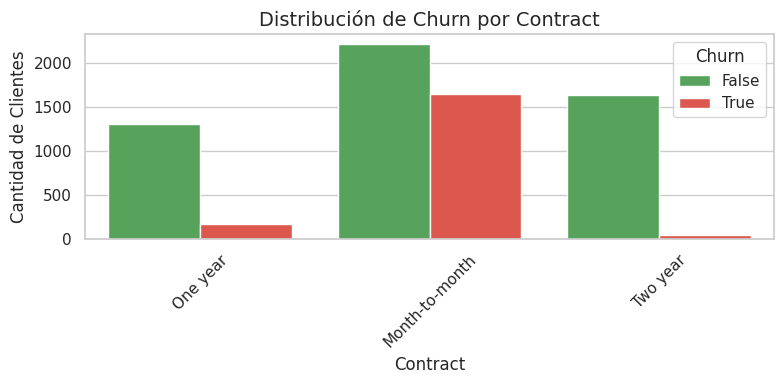

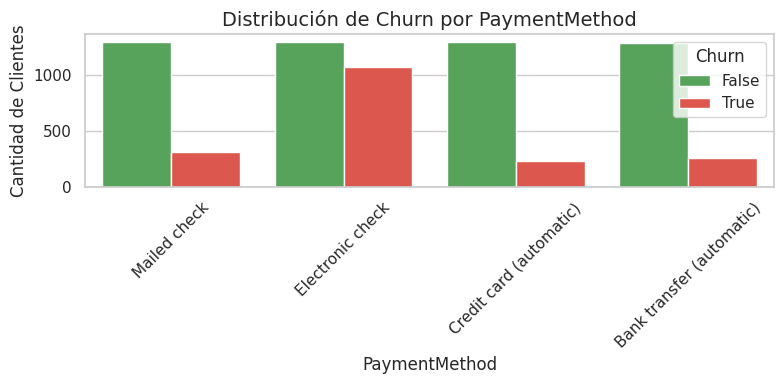

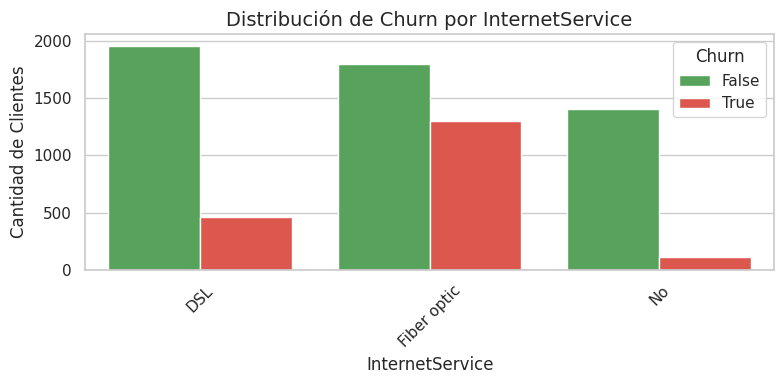

In [59]:

for col in categorical_vars:
    if col != 'Churn':
        churn_by_category(data_unificado, col)

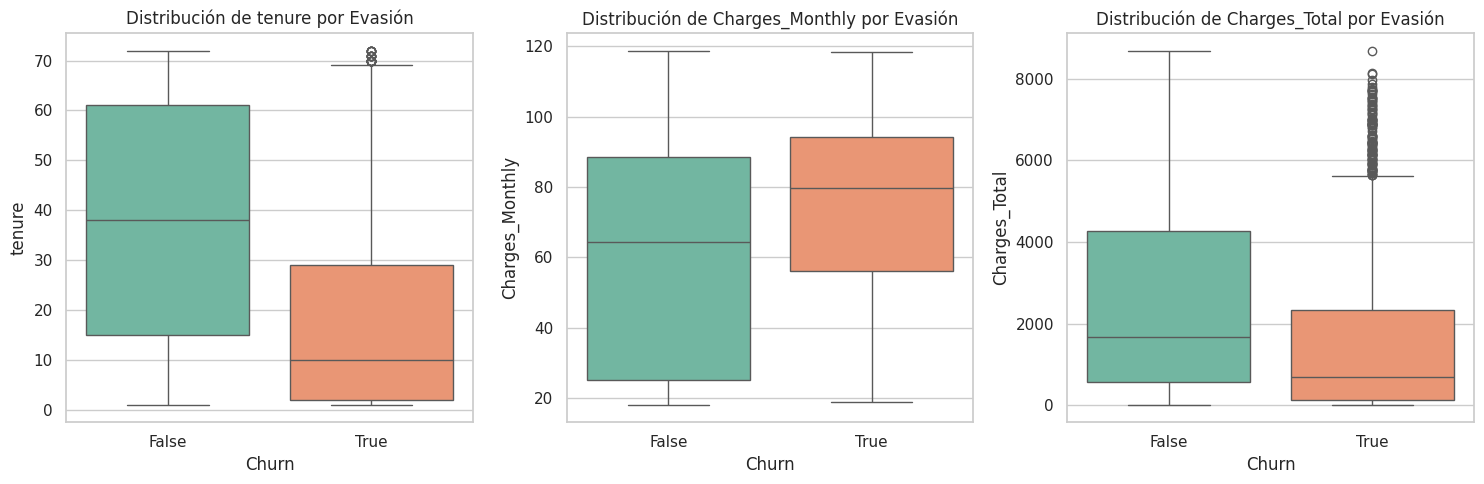

In [60]:
numericas = ['tenure', 'Charges_Monthly', 'Charges_Total']

fig, axes = plt.subplots(1, len(numericas), figsize=(15, 5))
sns.set(style="whitegrid")

for i, col in enumerate(numericas):
    sns.boxplot(
        x='Churn',
        y=col,
        hue='Churn',
        data=data_unificado,
        palette='Set2',
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'Distribución de {col} por Evasión')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Guardar imagen
fig.savefig(
    "/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/conteo_evasión_numérica.png",
    transparent=False, dpi=300, bbox_inches='tight'
)


In [61]:
data_unificado.to_csv("/content/drive/MyDrive/Estudio Oracle - data science/estadisticas/Estadística con Python: frecuencias y medidas/Telecom X parte 2/telecomX_2.csv", index=False)

#📄Informe final

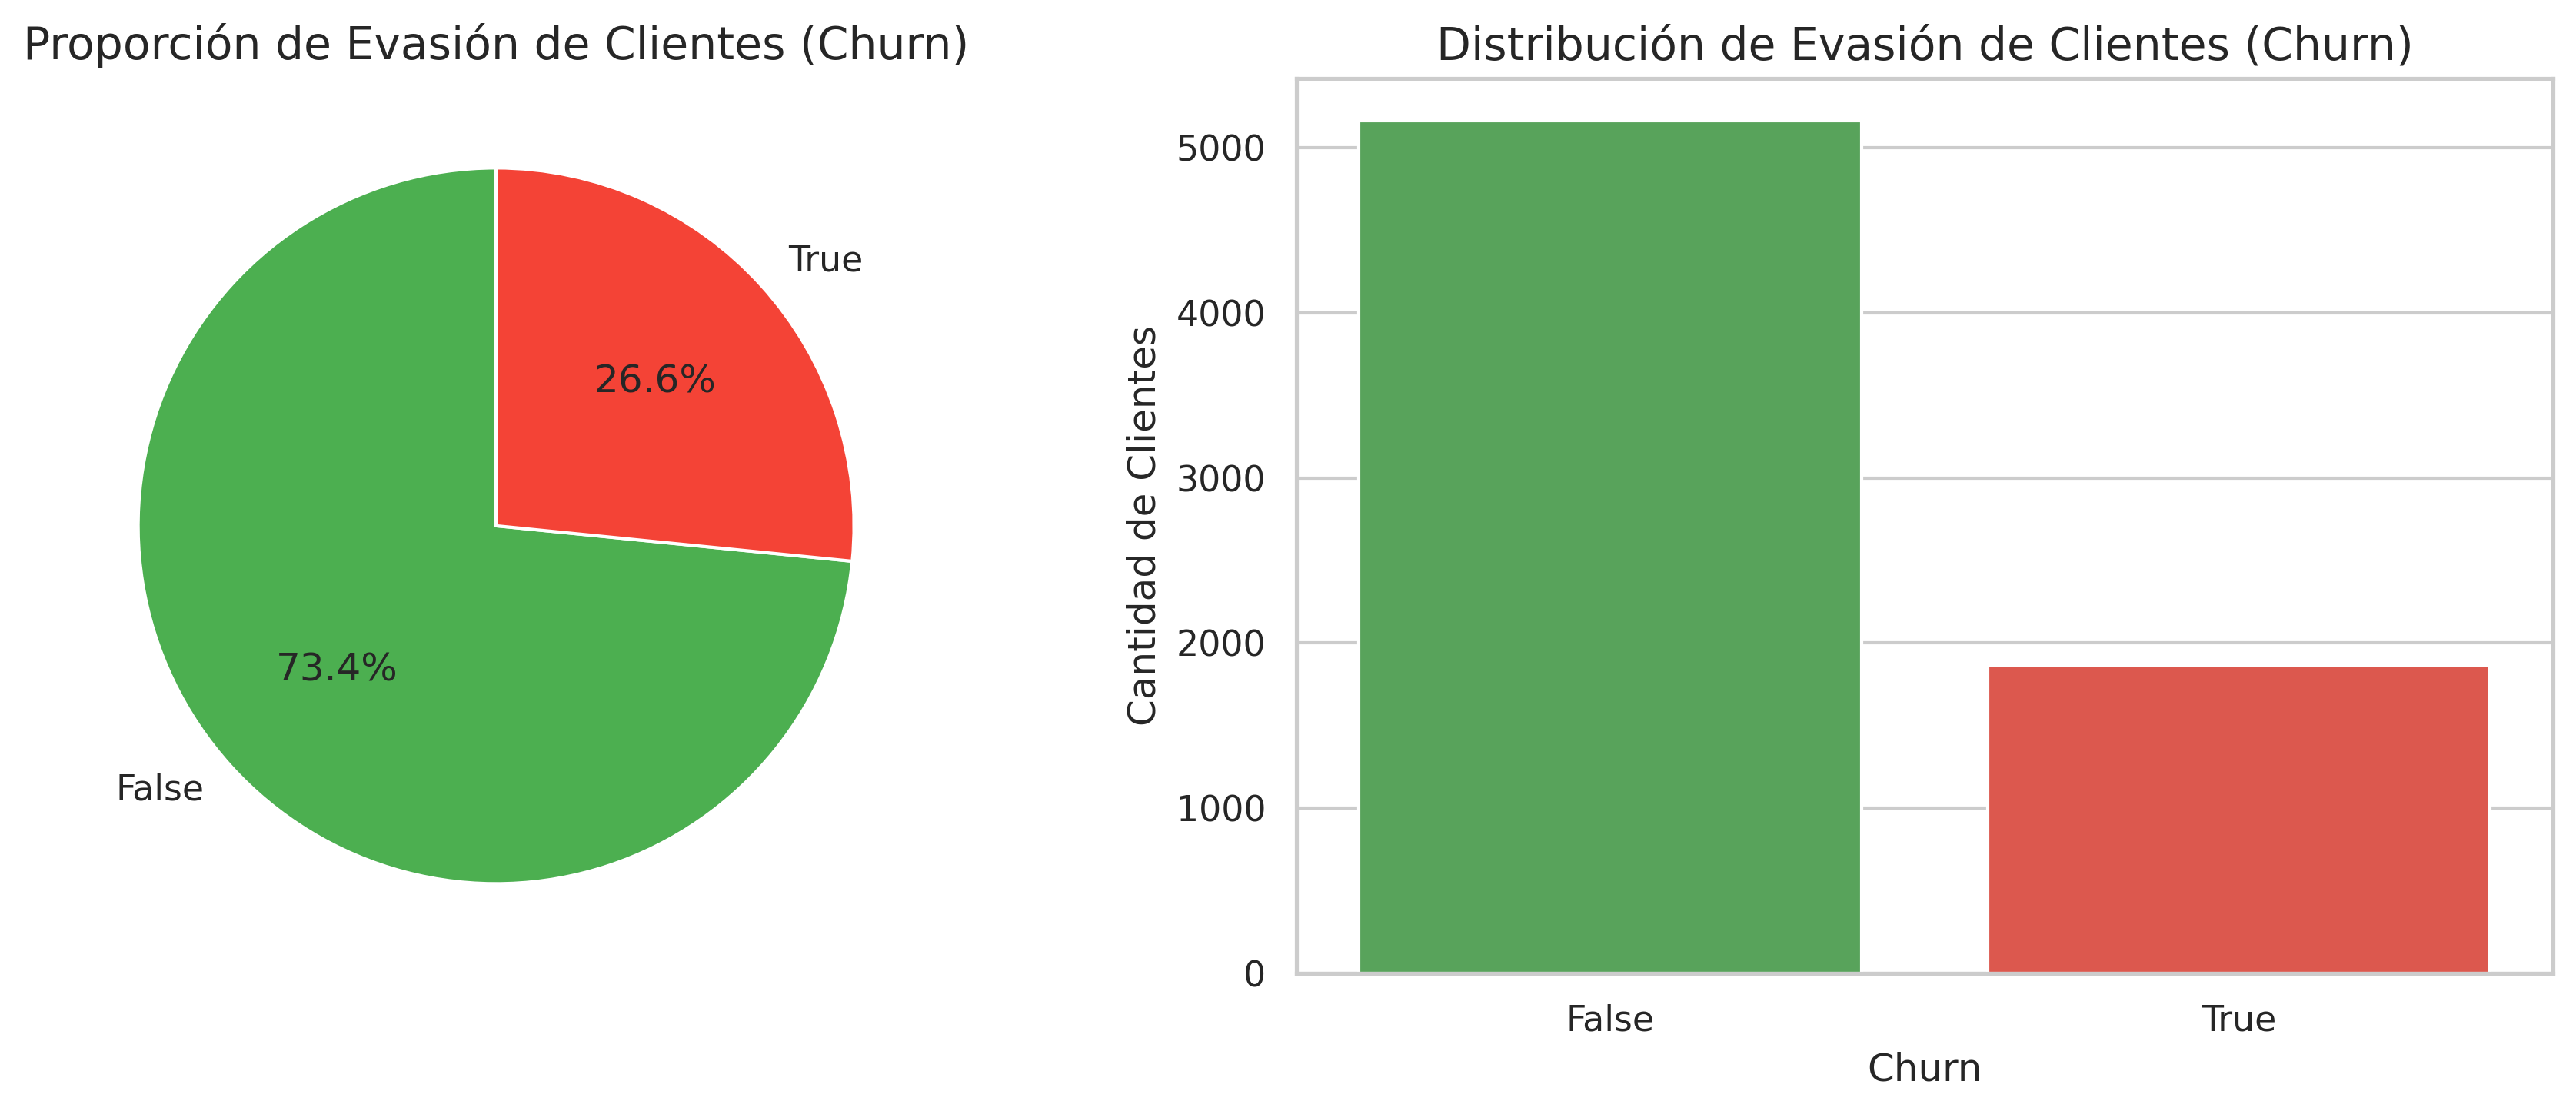

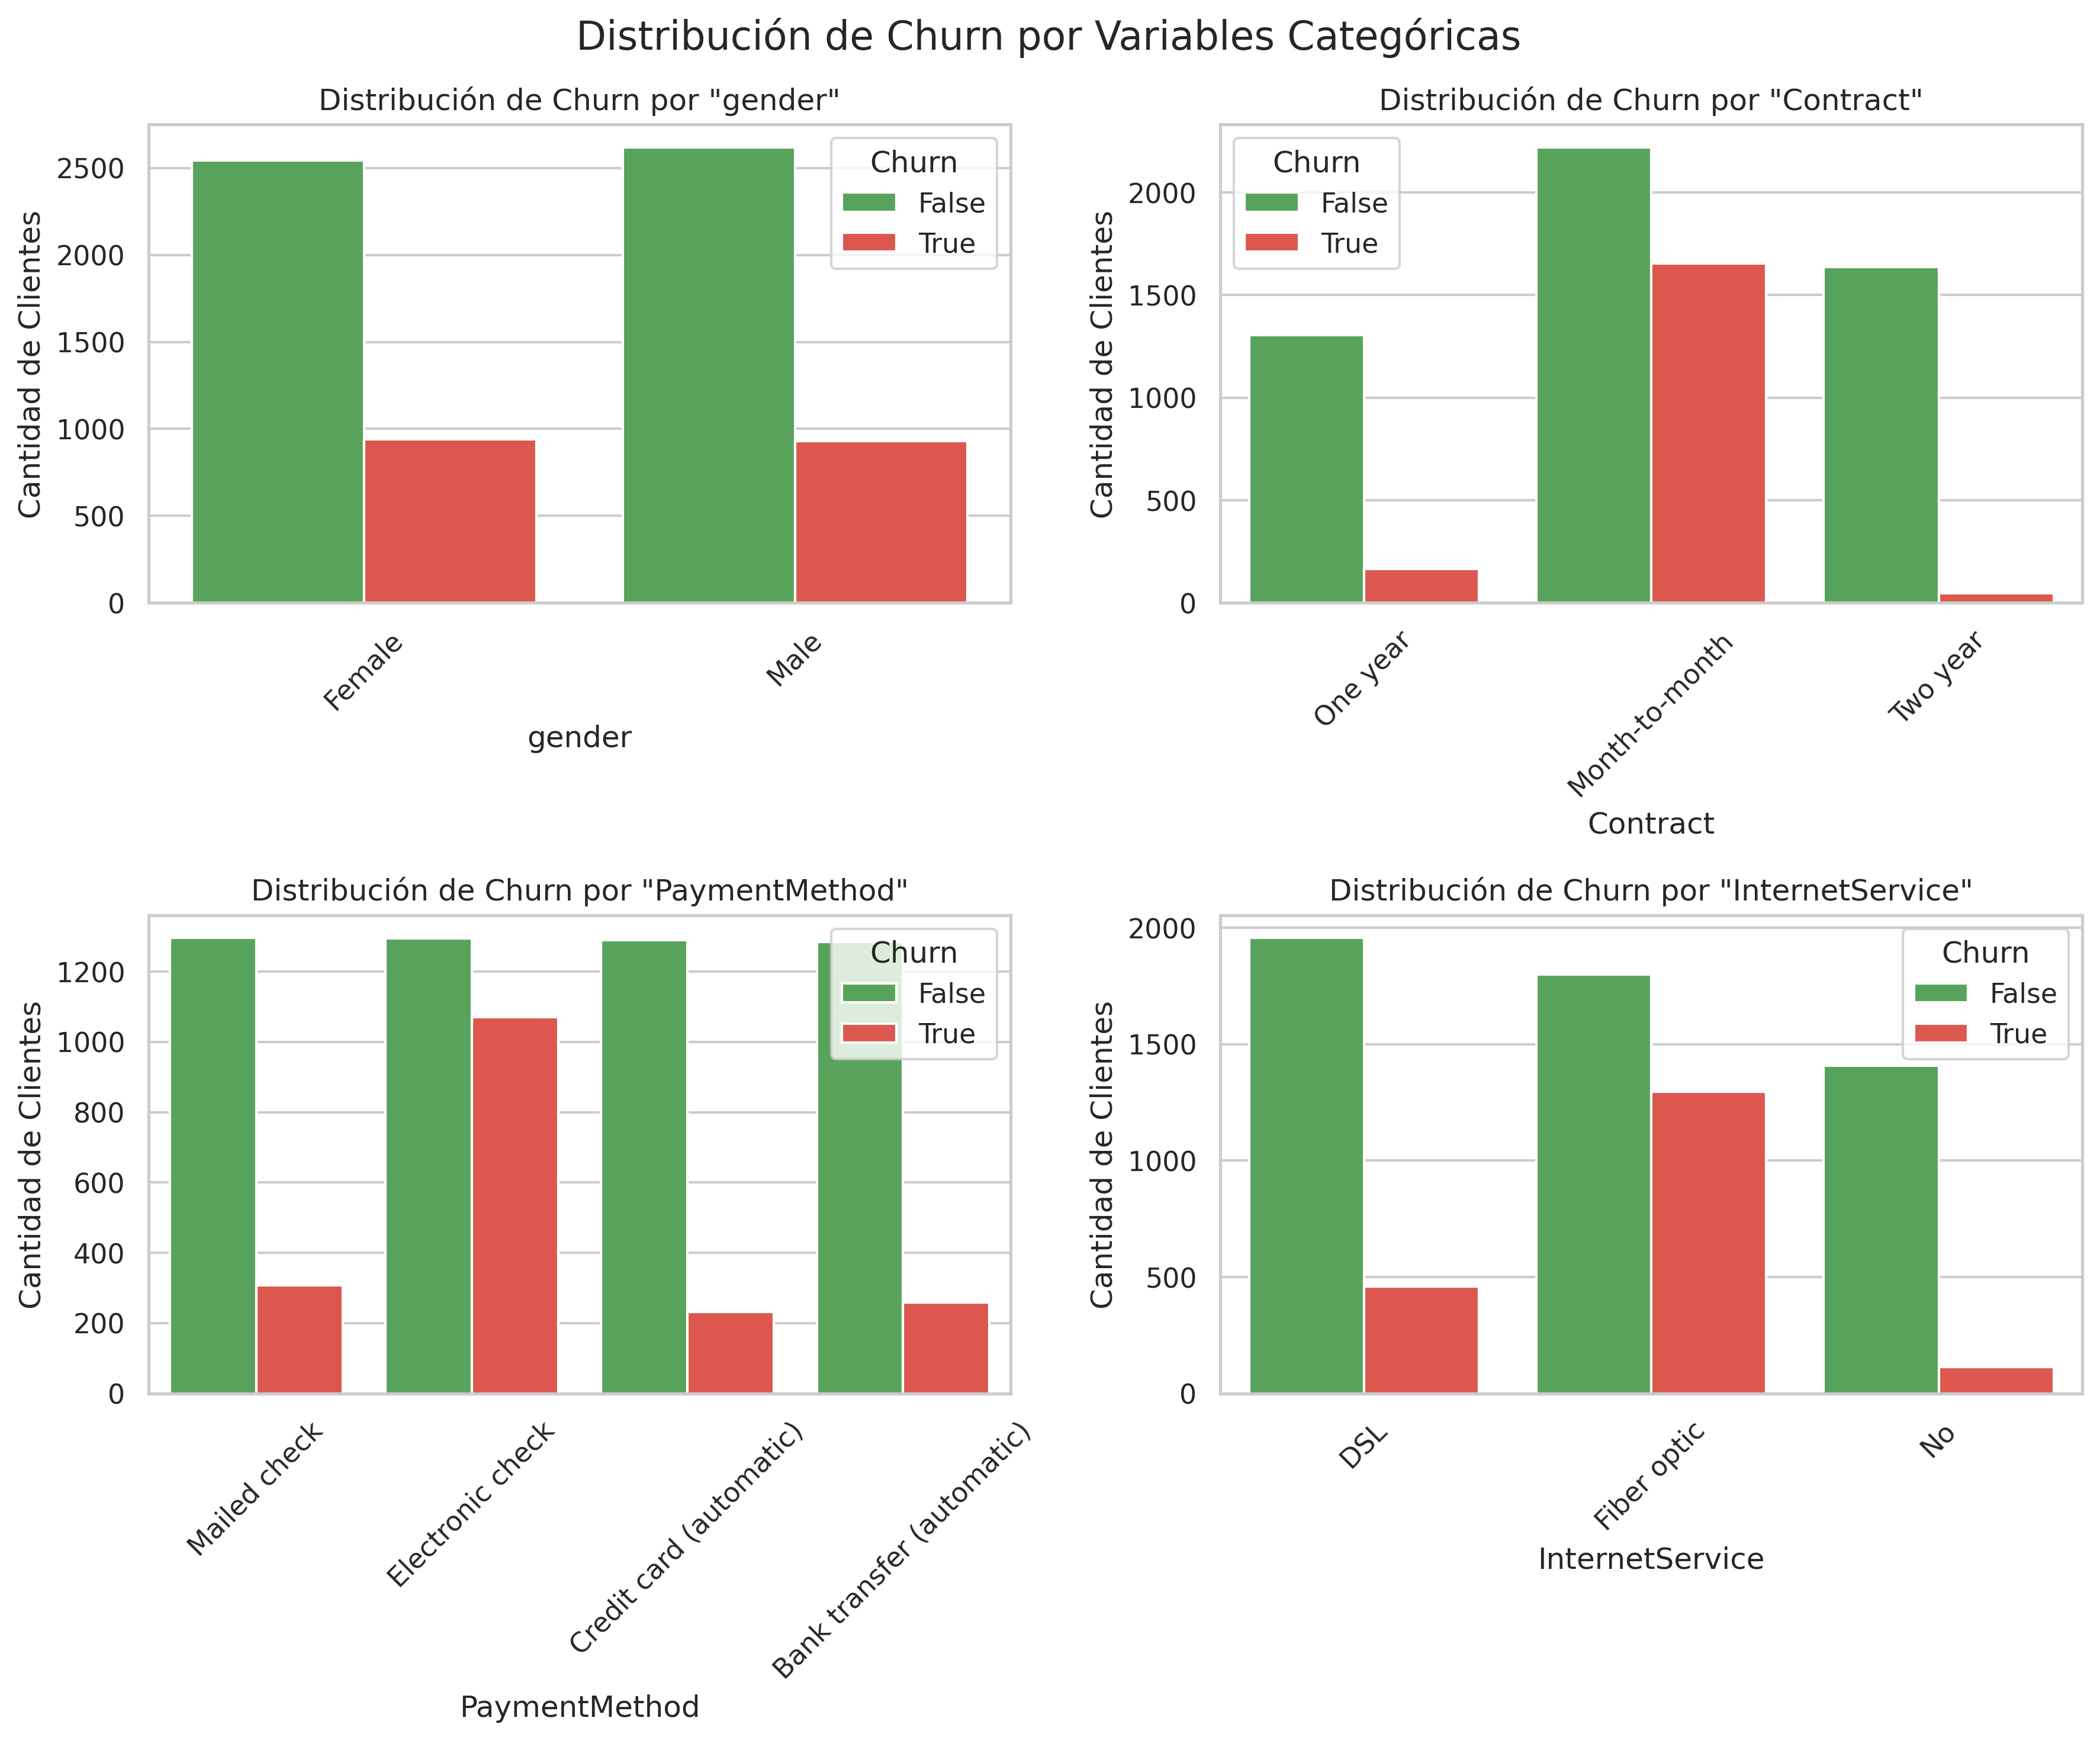

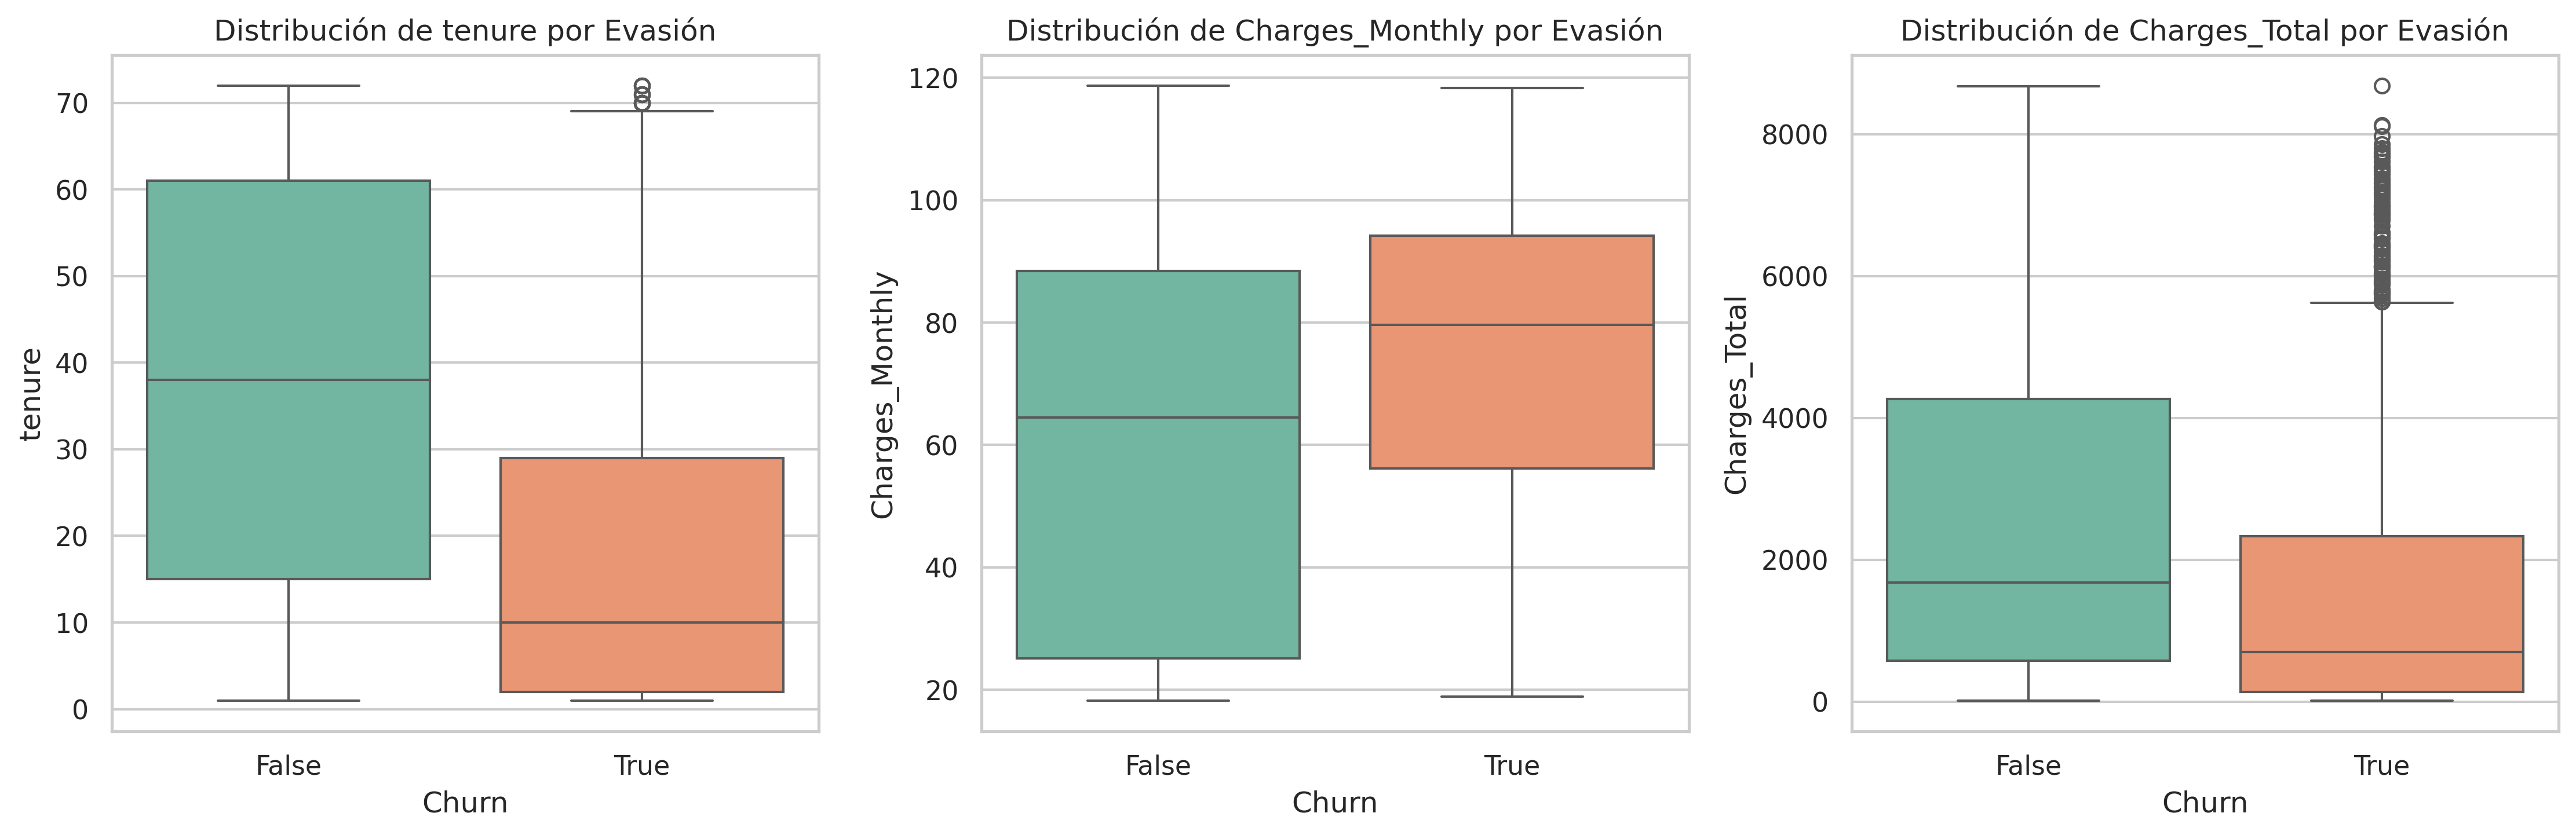

In [62]:
img1 = Image.open("/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/grafica_distrivucion_evacion.png")
img2 = Image.open("/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/grafica_distrivucion_Categóricas.png")
img3 = Image.open("/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/conteo_evasión_numérica.png")

display(img1)
display(img2)
display(img3)

# Informe Final – Análisis de Evasión (Churn) · Telecom X

## 1. Introducción
La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.
El objetivo de este análisis es **comprender los factores asociados a la evasión de clientes (Churn)** en Telecom X y **proponer acciones** que contribuyan a reducirla.

**Tamaño de la muestra:** 7,032 clientes
**Tasa de clientes perdidos (global):** 26.6% | **Retención:** 73.4%

---

## 2. Limpieza y Tratamiento de Datos
- Unificación de fuentes anidadas (`customer`, `phone`, `internet`, `account`) en `data_unificado`.
- Estandarización de tipos:
  - `Churn` a booleano; servicios adicionales y banderas a booleano.
  - Conversión de cargos: `Charges_Monthly` y `Charges_Total` a `float64`.
- Creación de métrica **Cuentas_Diarias** = `Charges_Monthly / 30` para granularidad diaria.
- Depuración de nombres problemáticos: renombre de `Charges.Monthly`→`Charges_Monthly` y `Charges.Total`→`Charges_Total`.
- Validaciones: ausencia de `NaN` críticos en cargos y coherencia de `tenure`.

---

## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Distribución de candelados
- Proporción de clientes: **cacelados = 26.6%** vs **continua = 73.4%**.
gráficos pastel y barras de `Churn`:
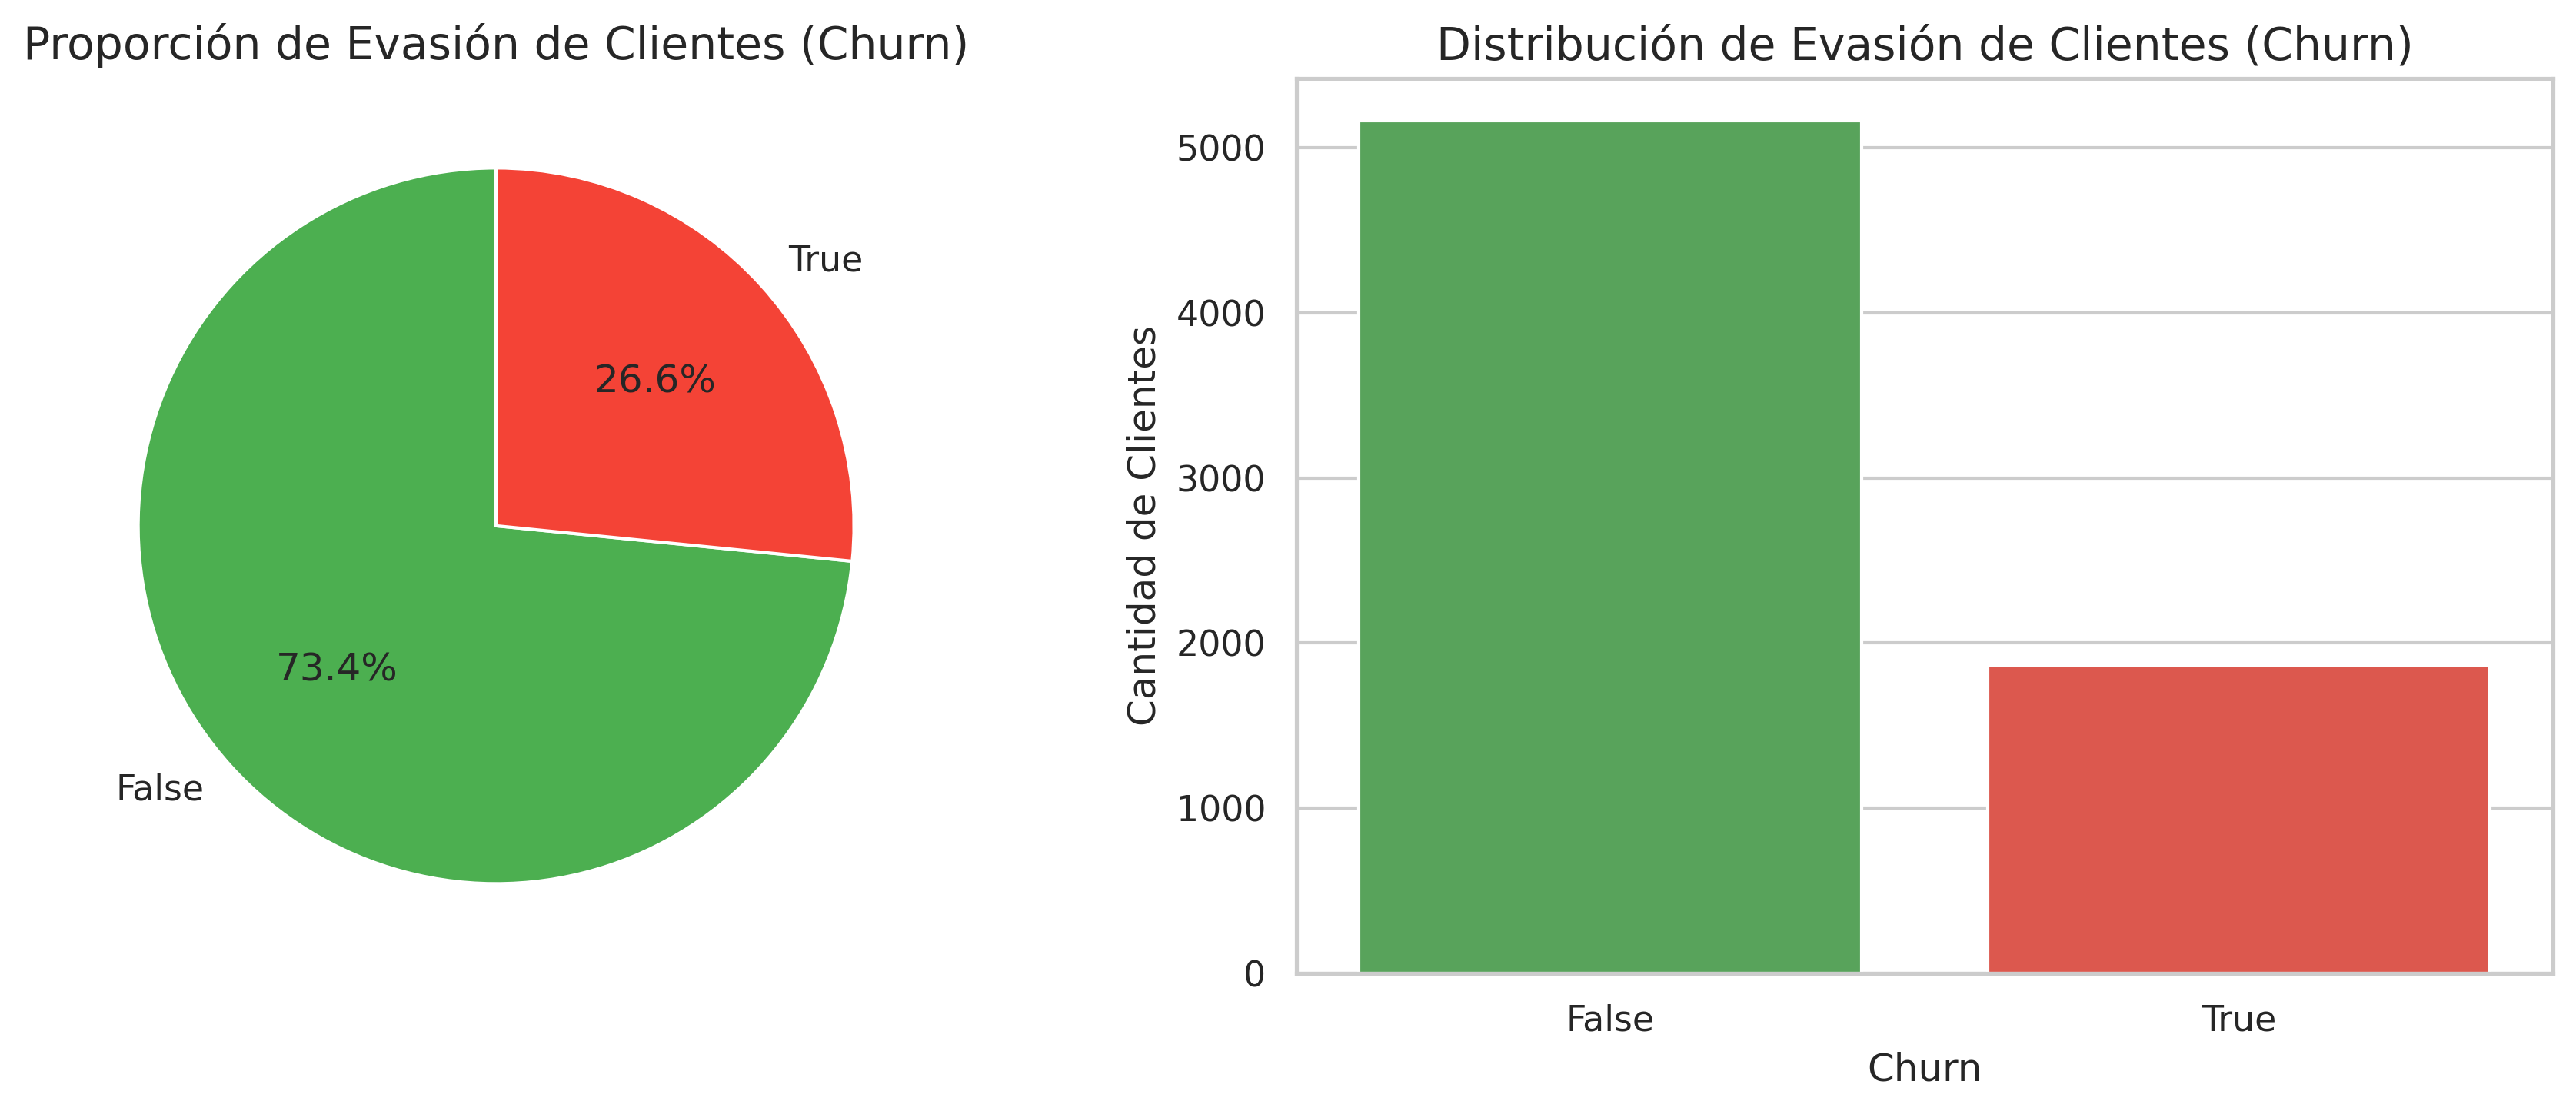

### 3.2 Resumen numérico de clientes
- **Tenure (meses):** media 32.42 | mediana 29 | rango [1, 72]
- **Cargos mensuales:** media 64.80 | mediana 70.35
- **Cargos totales:** media 2283.30 | mediana 1397.47
- **Cuentas diarias (≈ mensual/30):** media 2.16

### 3.3 evacion por variables categóricas
**Contrato (Contract) – Top evacion:**
- **Month-to-month** → 42.7%
- **One year** → 11.3%
- **Two year** → 2.8%

**Método de pago (PaymentMethod) – Top evacion:**
- **Electronic check** → 45.3%
- **Mailed check** → 19.2%
- **Bank transfer (automatic)** → 16.7%

**Tipo de Internet (InternetService) – Top evacion:**
- **Fiber optic** → 41.9%
- **DSL** → 19.0%
- **No** → 7.4%

**Género (gender) – Diferencias:**
- **Female** → 27.0%
- **Male** → 26.2%

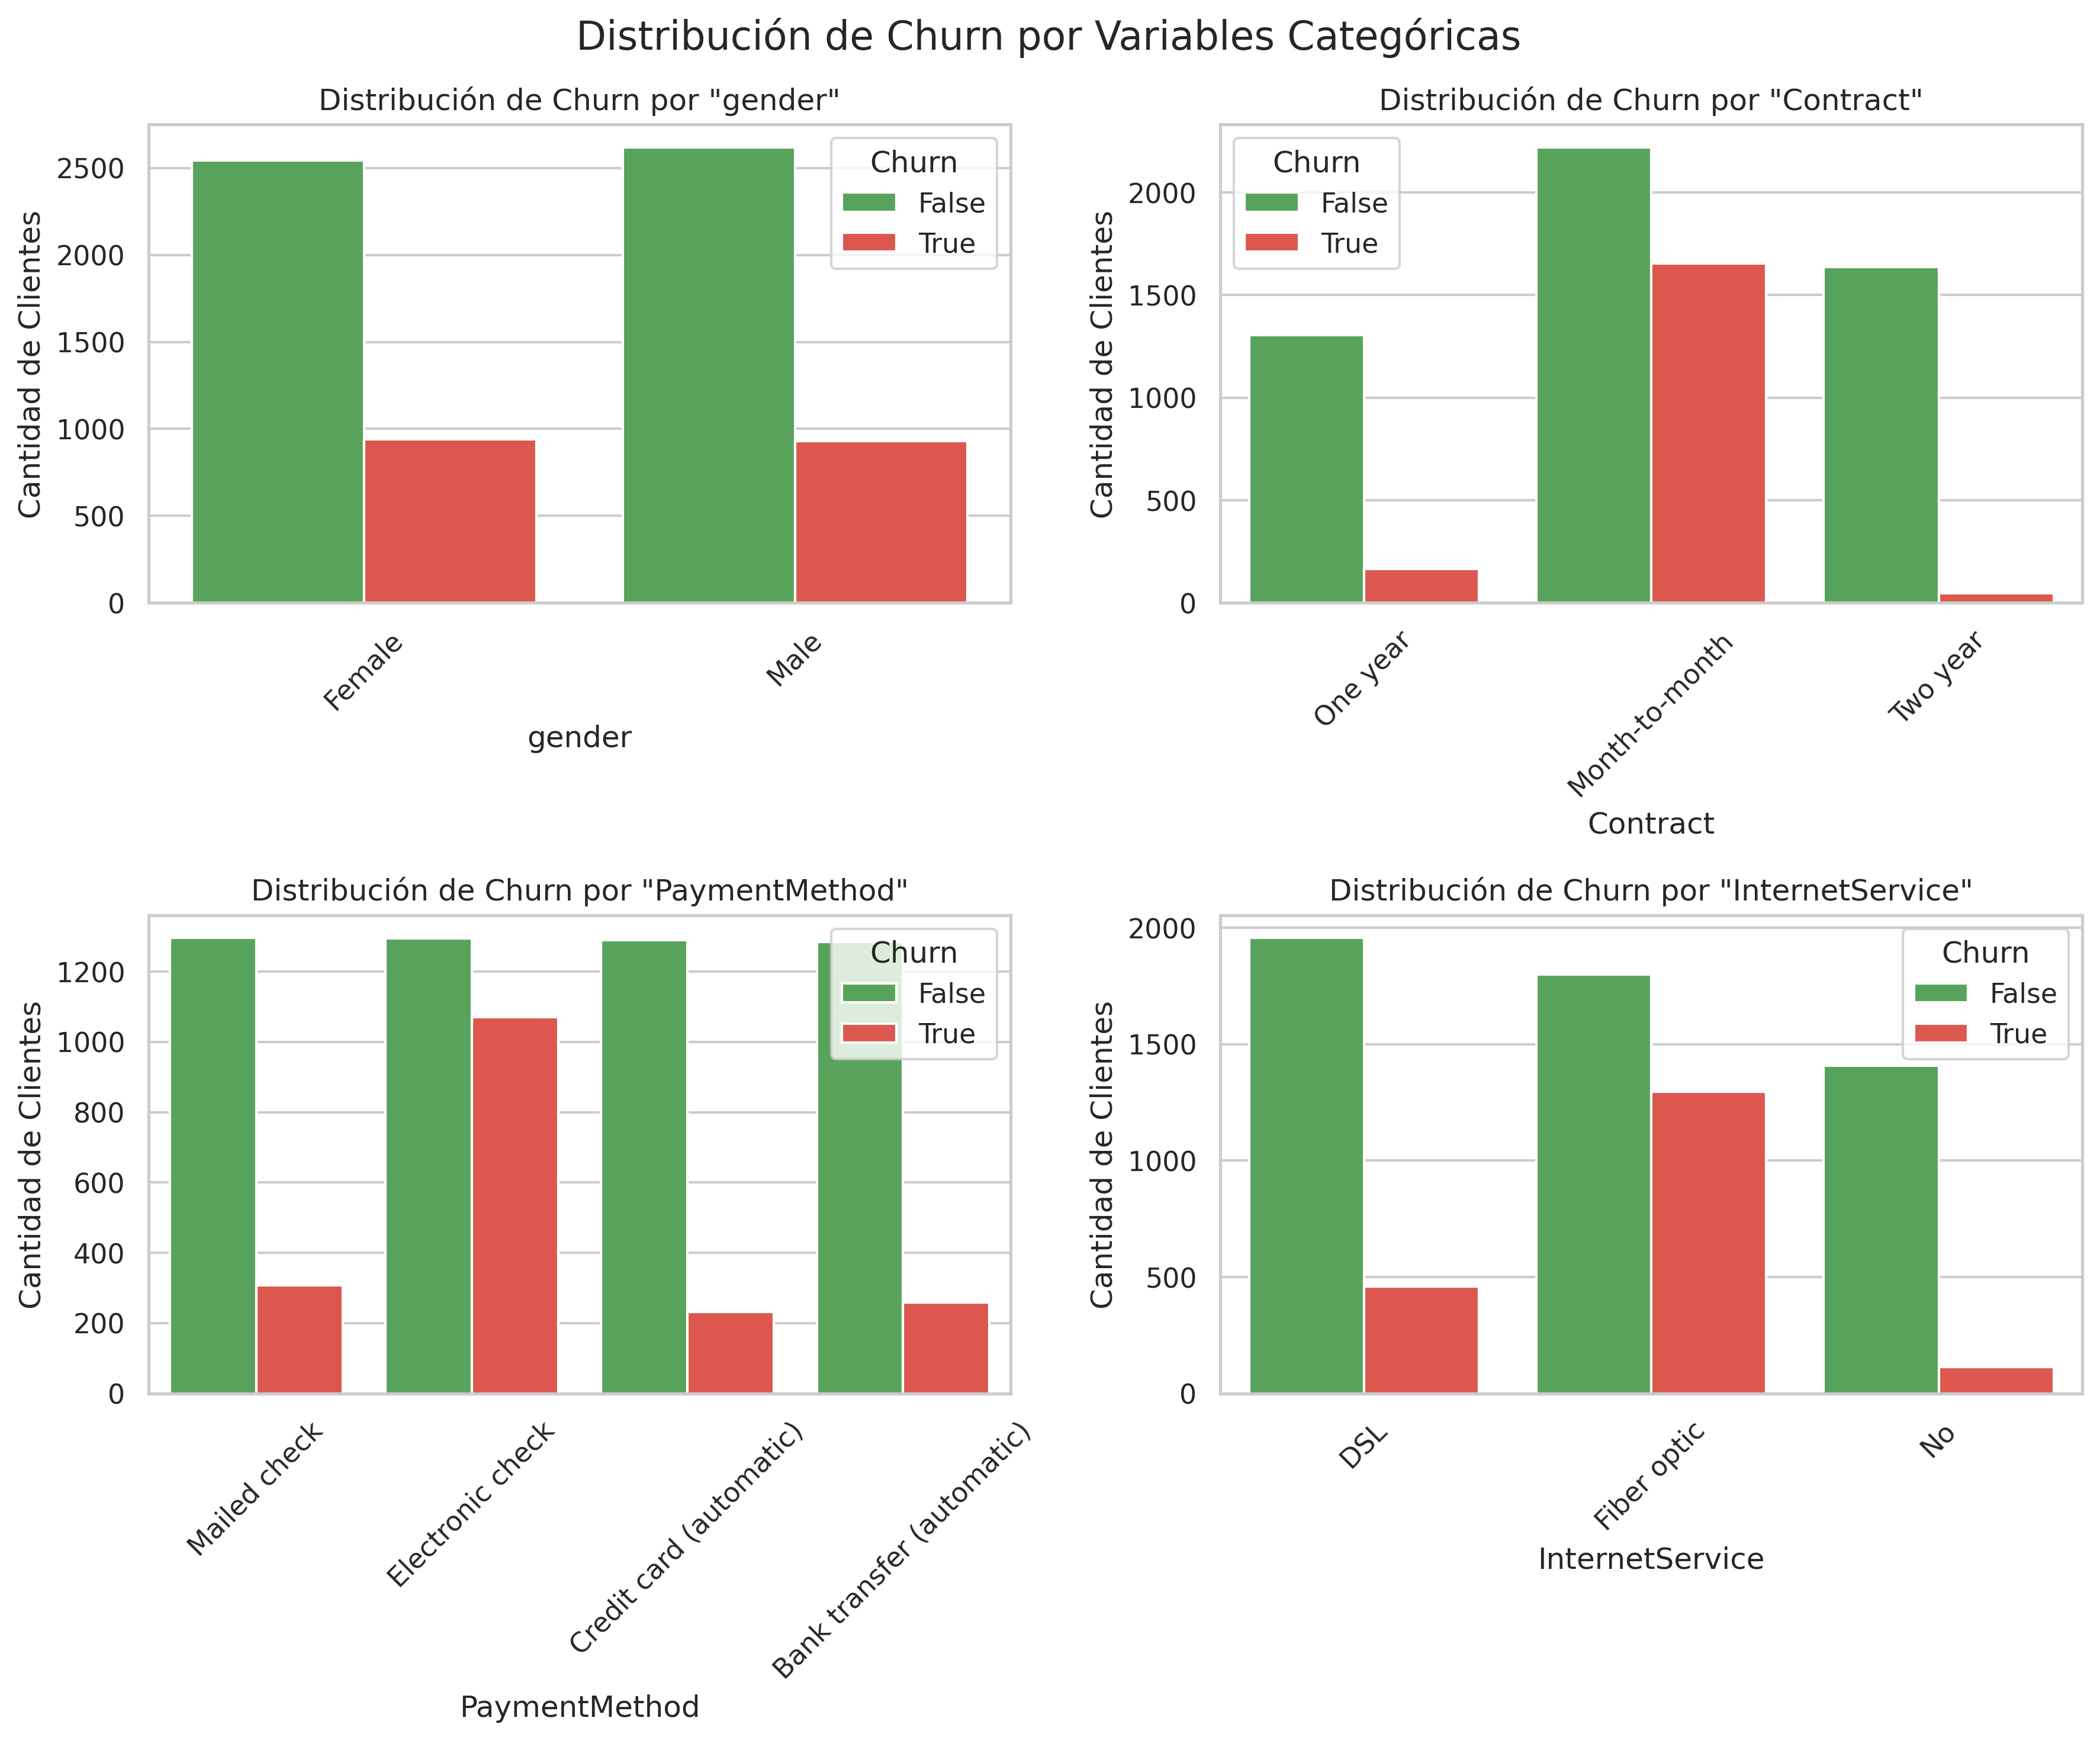

### 3.4 Churn y variables numéricas
- **tenure:** típicamente, clientes con menor antigüedad muestran mayor cancelacion (confirmar en boxplots).
- **Charges_Monthly:** revisar si tarifas más altas se asocian a mayor cancelacion (boxplot/histograma por `Churn`).
- **Charges_Total:** valores bajos suelen reflejar clientes recientes con mayor probabilidad de fuga.

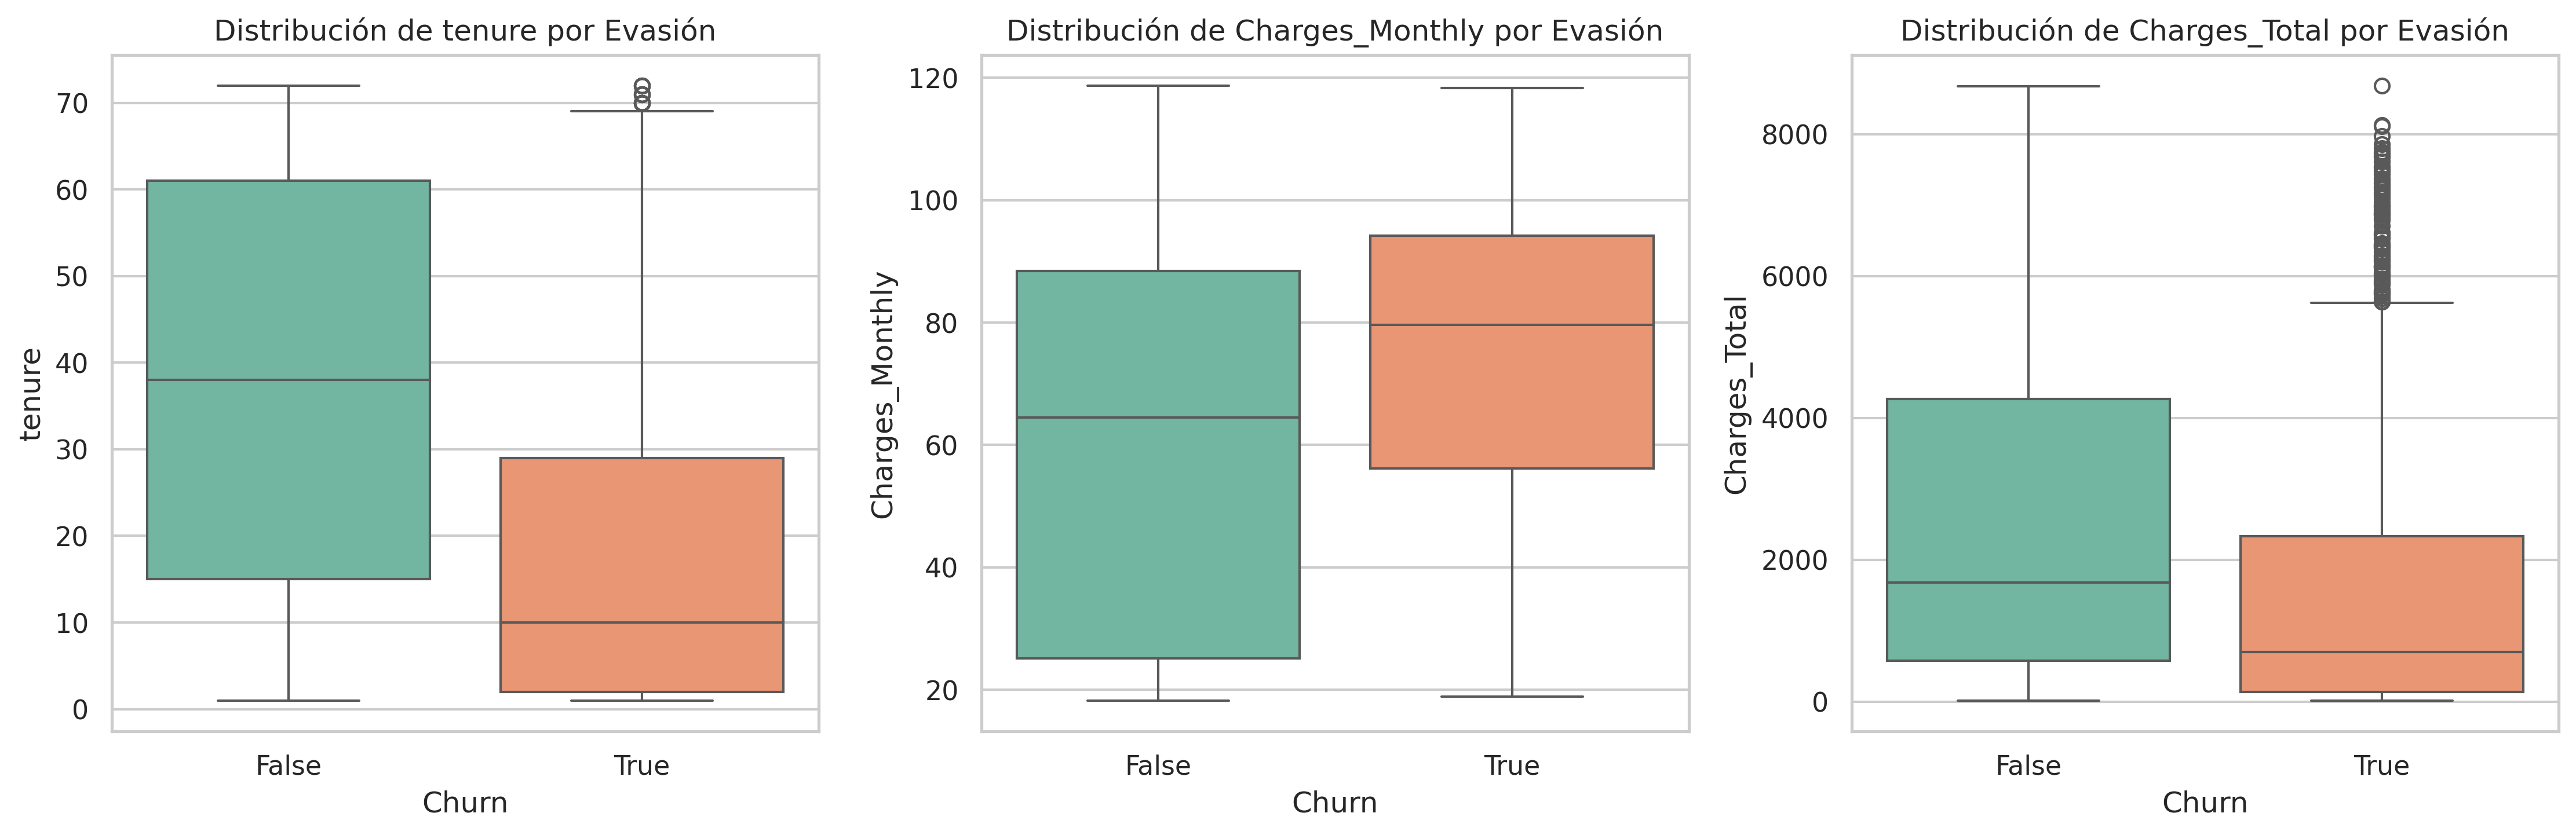

---

## 4. Conclusiones e Insights
1. **Tasa de cancelaciones relevantes:** 26.6% indica una pérdida importante de clientes.
2. **Contrato mes a mes** concentra mayor cancelacion (flexibilidad alta → salida fácil).
3. **Electronic check** (si aparece en top) muestra **tendencia a mayor cancelaciones** frente a métodos automáticos (transferencia/crédito).
4. **Internet de fibra/DSL**: evaluar si una tecnología específica concentra más cancelacion (p. ej., por expectativas de calidad/soporte).
5. **Tenure bajo** se asocia a mayor cancelacion: primeros meses críticos para retener.
6. **Cargos**: si los clientes con cargos mensuales más altos muestran más cancelaciones, revisar percepción de valor/precio y estructura de planes.

---

## 5. Recomendaciones
**Acción 1 – Migración de contrato:**
- Incentivos para pasar de **Month-to-month** a **One/Two year** (descuentos iniciales, beneficios exclusivos).
- Programas de permanencia con recompensas a 3, 6 y 12 meses.

**Acción 2 – Optimizar método de pago:**
- **Fomentar métodos automáticos** (transferencia/crédito) con bonificaciones pequeñas y recordatorios in-app/web.
- UX de pago simplificada y comunicación proactiva ante fallos de cobro.

**Acción 3 – Mejora de experiencia temprana (onboarding):**
- Contacto proactivo en **primeros 90 días** (asistencia, tutoriales, chequeo de satisfacción).
- Paquetes de valor: seguridad online/soporte técnico con prueba gratuita y fácil activación.

**Acción 4 – Gestión de precio y valor:**
- Revisión de planes con **cargos mensuales altos**: oferta de alternativas o **bundles** que aumenten percepción de valor.
- Monitorizar tickets de soporte y rendimiento (especialmente clientes de fibra/DSL con mayor churn).

**Acción 5 – Analítica continua:**
- Modelo de **propensión a churn** para priorizar campañas.
- Panel de control semanal con **churn por segmento** (contrato, pago, internet) y KPIs de retención.

---

## 6. Próximos pasos
- Incorporar variables de **soporte/quejas** y **calidad de servicio** si están disponibles.
- Medir impacto de campañas de retención (A/B tests) sobre segmentos con mayor propensión.
- (Opcional) Incluir **dimensión temporal real** si se obtiene fecha de alta para estudiar estacionalidad.

---

### cancelacion por Contract
| Contract       |   churn_rate |
|:---------------|-------------:|
| Month-to-month |    0.427097  |
| One year       |    0.112772  |
| Two year       |    0.0284866 |

### cancelacion por PaymentMethod
| PaymentMethod             |   churn_rate |
|:--------------------------|-------------:|
| Electronic check          |     0.452854 |
| Mailed check              |     0.19202  |
| Bank transfer (automatic) |     0.167315 |
| Credit card (automatic)   |     0.152531 |

### cancelacion por InternetService
| InternetService   |   churn_rate |
|:------------------|-------------:|
| Fiber optic       |    0.418928  |
| DSL               |    0.189983  |
| No                |    0.0743421 |

### cancelacion por gender
| gender   |   churn_rate |
|:---------|-------------:|
| Female   |     0.269595 |
| Male     |     0.262046 |

In [63]:
# ================================
# INFORME FINAL – TELECOM X (Churn)
# ================================

from textwrap import dedent
import base64

df = data_unificado.copy()

# --- Utilidades
def pct(x, d=1):
    return f"{x*100:.{d}f}%"

def safe_rate(s):
    s = s.astype(int)
    return s.mean()

# --- Métricas globales
n = len(df)
churn_rate = safe_rate(df["Churn"])
retention_rate = 1 - churn_rate

tenure_mean = df["tenure"].mean()
tenure_median = df["tenure"].median()

mcharges_mean = df["Charges_Monthly"].mean()
mcharges_median = df["Charges_Monthly"].median()

tcharges_mean = df["Charges_Total"].mean()
tcharges_median = df["Charges_Total"].median()

# --- Churn por variables categóricas clave
def churn_table(col):
    tmp = (
        df.groupby(col)["Churn"]
        .mean()
        .rename("churn_rate")
        .reset_index()
        .sort_values("churn_rate", ascending=False)
    )
    return tmp

churn_by_contract = churn_table("Contract")
churn_by_pay = churn_table("PaymentMethod")
churn_by_inet = churn_table("InternetService")
churn_by_gender = churn_table("gender")

# Top categorías con mayor churn (para destacar)
def top3_markdown(tabla, col):
    lines = []
    for _, r in tabla.head(3).iterrows():
        lines.append(f"- **{r[col]}** → {pct(r['churn_rate'])}")
    return "\n".join(lines) if lines else "- (sin datos)"

# --- Estadísticos clave numéricos (para narrativa)
senior_share = df["SeniorCitizen"].mean() if "SeniorCitizen" in df else np.nan
paperless_share = df["PaperlessBilling"].mean() if "PaperlessBilling" in df else np.nan

# --- Graficas

## distrivucion_evacion
ruta_img_distrivucion_evacion = "/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/grafica_distrivucion_evacion.png"
ruta_img_distrivucion_categóricas = "/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/grafica_distrivucion_Categóricas.png"
ruta_img_conteo_evasión_numérica = "/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/conteo_evasión_numérica.png"

with open(ruta_img_distrivucion_evacion, "rb") as img_file:
    b64_img_evacion = base64.b64encode(img_file.read()).decode()

with open(ruta_img_distrivucion_categóricas, "rb") as img_file:
    b64_img_categóricas = base64.b64encode(img_file.read()).decode()

with open(ruta_img_conteo_evasión_numérica, "rb") as img_file:
    b64_img_evasión_numérica = base64.b64encode(img_file.read()).decode()

grafica_distrivucion_evacion = f'<img src="data:image/png;base64,{b64_img_evacion}" alt="Gráfico Churn" width="600"/>'
grafica_distrivucion_categóricas = f'<img src="data:image/png;base64,{b64_img_categóricas}" alt="Gráfico Churn" width="600"/>'
grafica_distrivucion_evasión_numérica = f'<img src="data:image/png;base64,{b64_img_evasión_numérica}" alt="Gráfico Churn" width="600"/>'

## distrivucion_evacion

# --- Informe en Markdown
informe = dedent(f"""
# Informe Final – Análisis de Evasión (Churn) · Telecom X

## 1. Introducción
La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.
El objetivo de este análisis es **comprender los factores asociados a la evasión de clientes (Churn)** en Telecom X y **proponer acciones** que contribuyan a reducirla.

**Tamaño de la muestra:** {n:,} clientes
**Tasa de clientes perdidos (global):** {pct(churn_rate)} | **Retención:** {pct(retention_rate)}

---

## 2. Limpieza y Tratamiento de Datos
- Unificación de fuentes anidadas (`customer`, `phone`, `internet`, `account`) en `data_unificado`.
- Estandarización de tipos:
  - `Churn` a booleano; servicios adicionales y banderas a booleano.
  - Conversión de cargos: `Charges_Monthly` y `Charges_Total` a `float64`.
- Creación de métrica **Cuentas_Diarias** = `Charges_Monthly / 30` para granularidad diaria.
- Depuración de nombres problemáticos: renombre de `Charges.Monthly`→`Charges_Monthly` y `Charges.Total`→`Charges_Total`.
- Validaciones: ausencia de `NaN` críticos en cargos y coherencia de `tenure`.

---

## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Distribución de candelados
- Proporción de clientes: **cacelados = {pct(churn_rate)}** vs **continua = {pct(1-churn_rate)}**.
gráficos pastel y barras de `Churn`:
{grafica_distrivucion_evacion}

### 3.2 Resumen numérico de clientes
- **Tenure (meses):** media {tenure_mean:.2f} | mediana {tenure_median:.0f} | rango [1, 72]
- **Cargos mensuales:** media {mcharges_mean:.2f} | mediana {mcharges_median:.2f}
- **Cargos totales:** media {tcharges_mean:.2f} | mediana {tcharges_median:.2f}
- **Cuentas diarias (≈ mensual/30):** media {df["Cuentas_Diarias"].mean():.2f}

### 3.3 evacion por variables categóricas
**Contrato (Contract) – Top evacion:**
{top3_markdown(churn_by_contract, "Contract")}

**Método de pago (PaymentMethod) – Top evacion:**
{top3_markdown(churn_by_pay, "PaymentMethod")}

**Tipo de Internet (InternetService) – Top evacion:**
{top3_markdown(churn_by_inet, "InternetService")}

**Género (gender) – Diferencias:**
{top3_markdown(churn_by_gender, "gender")}

{grafica_distrivucion_categóricas}

### 3.4 Churn y variables numéricas
- **tenure:** típicamente, clientes con menor antigüedad muestran mayor cancelacion (confirmar en boxplots).
- **Charges_Monthly:** revisar si tarifas más altas se asocian a mayor cancelacion (boxplot/histograma por `Churn`).
- **Charges_Total:** valores bajos suelen reflejar clientes recientes con mayor probabilidad de fuga.

{grafica_distrivucion_evasión_numérica}

---

## 4. Conclusiones e Insights
1. **Tasa de cancelaciones relevantes:** {pct(churn_rate)} indica una pérdida importante de clientes.
2. **Contrato mes a mes** concentra mayor cancelacion (flexibilidad alta → salida fácil).
3. **Electronic check** (si aparece en top) muestra **tendencia a mayor cancelaciones** frente a métodos automáticos (transferencia/crédito).
4. **Internet de fibra/DSL**: evaluar si una tecnología específica concentra más cancelacion (p. ej., por expectativas de calidad/soporte).
5. **Tenure bajo** se asocia a mayor cancelacion: primeros meses críticos para retener.
6. **Cargos**: si los clientes con cargos mensuales más altos muestran más cancelaciones, revisar percepción de valor/precio y estructura de planes.

---

## 5. Recomendaciones
**Acción 1 – Migración de contrato:**
- Incentivos para pasar de **Month-to-month** a **One/Two year** (descuentos iniciales, beneficios exclusivos).
- Programas de permanencia con recompensas a 3, 6 y 12 meses.

**Acción 2 – Optimizar método de pago:**
- **Fomentar métodos automáticos** (transferencia/crédito) con bonificaciones pequeñas y recordatorios in-app/web.
- UX de pago simplificada y comunicación proactiva ante fallos de cobro.

**Acción 3 – Mejora de experiencia temprana (onboarding):**
- Contacto proactivo en **primeros 90 días** (asistencia, tutoriales, chequeo de satisfacción).
- Paquetes de valor: seguridad online/soporte técnico con prueba gratuita y fácil activación.

**Acción 4 – Gestión de precio y valor:**
- Revisión de planes con **cargos mensuales altos**: oferta de alternativas o **bundles** que aumenten percepción de valor.
- Monitorizar tickets de soporte y rendimiento (especialmente clientes de fibra/DSL con mayor churn).

**Acción 5 – Analítica continua:**
- Modelo de **propensión a churn** para priorizar campañas.
- Panel de control semanal con **churn por segmento** (contrato, pago, internet) y KPIs de retención.

---

## 6. Próximos pasos
- Incorporar variables de **soporte/quejas** y **calidad de servicio** si están disponibles.
- Medir impacto de campañas de retención (A/B tests) sobre segmentos con mayor propensión.
- (Opcional) Incluir **dimensión temporal real** si se obtiene fecha de alta para estudiar estacionalidad.

---

### cancelacion por Contract
{churn_by_contract.to_markdown(index=False)}

### cancelacion por PaymentMethod
{churn_by_pay.to_markdown(index=False)}

### cancelacion por InternetService
{churn_by_inet.to_markdown(index=False)}

### cancelacion por gender
{churn_by_gender.to_markdown(index=False)}
""").strip()

# Mostrar en notebook
from IPython.display import Markdown, display
display(Markdown(informe))

# Guardar a archivo (útil para enviar/compartir)
with open("/content/drive/MyDrive/Estudio Oracle - data science/Visualisacion Creando Graficos/desafio telecomX/informe_telecomx.md", "w", encoding="utf-8") as f:
    f.write(informe)

